In [130]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import box

import xarray as xr
import cmocean
import cmocean.plots
import matplotlib.patches as patches

# Load ROMS grid

In [3]:
#open dataset
ds = xr.open_dataset('/Users/scook/Desktop/research/proj/Ch_Bay/grid/Chesapeake_Bay_NCEI_EasternNeck_handpicked_msl_grd.nc')
lons = ds.variables['lon_rho'][:]
lats = ds.variables['lat_rho'][:]
nr = ds.variables['mask_rho'][:]
h = ds.variables['h'][:]


#### make mask values NaN

In [92]:
nr = np.where(nr==0,np.nan,nr)
nr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

#### Plot the grid

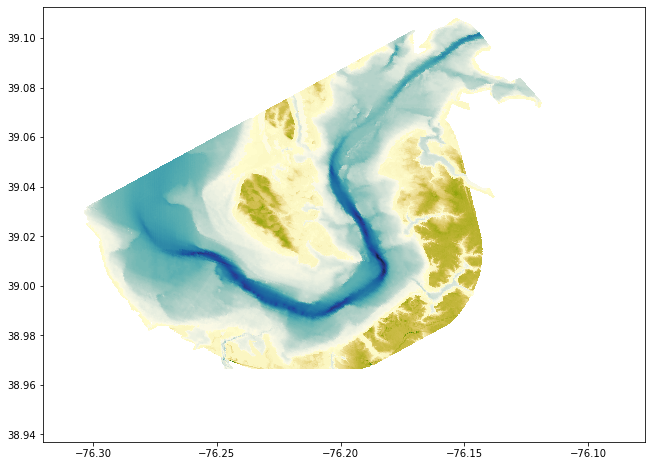

In [176]:
# Plot Data
fig = plt.figure(figsize=[16,8])

lightcmap = cmocean.tools.crop(cmocean.cm.delta,-20, 12, 0, N=None, dmax=None)

plt.pcolormesh(lons,lats,-1*h*nr,cmap=lightcmap,shading='nearest')
plt.gca().set_aspect('equal', adjustable='box')

# Load and plot shapefile

Using Pangeo python environment with earthpy installed
https://pypi.org/project/earthpy/


In [395]:
# import shapefile using geopandas
marsh = gpd.read_file('/Users/scook/Desktop/research/proj/Ch_Bay/grid/Marsh_Mask/ENI_NWI_coastal_wetlands_WGS84/ENI_NWI_coastal_wetlands_WGS84.shp')
sed = gpd.read_file('/Users/scook/Desktop/research/proj/Ch_Bay/Chesapeake_Bay/Sediments/Maryland_Soils_-_Chesapeake_Bay_Bottom_Survey-shp/MD_sediments.shp')
sav = gpd.read_file('/Users/scook/Desktop/research/proj/Ch_Bay/Chesapeake_Bay/SAV/2018/sav2018/sav18_final_122019/beds18.shp')

### Plot the MARSH data

<AxesSubplot:>

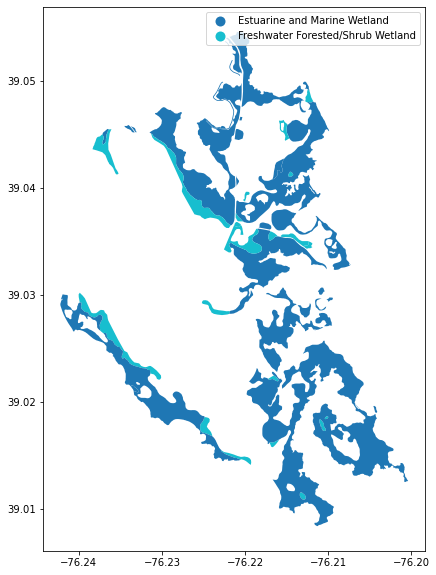

In [211]:
fig, ax = plt.subplots(figsize = (10,10))
marsh.plot(column='WETLAND_TY', cmap=None, legend=True,ax=ax)

#### Create a subset of Marsh Data

In [179]:
estuary = marsh[marsh['WETLAND_TY'].isin(['Estuarine and Marine Wetland'])]
fresh = marsh[marsh['WETLAND_TY'].isin(['Freshwater Forested/Shrub Wetland'])]

Print 4 lines of the data

In [262]:
estuary.head(4)
fresh.head(4)

,ATTRIBUTE,WETLAND_TY,ACRES,Shape_Leng,Shape_Area,geometry
26,PFO1/4R,Freshwater Forested/Shrub Wetland,2.745238,697.368146,11109.579067,"POLYGON ((-76.21239 39.03505, -76.21239 39.035..."
27,PFO1R,Freshwater Forested/Shrub Wetland,3.236019,746.235870,13095.707831,"POLYGON ((-76.22375 39.02871, -76.22369 39.028..."
28,PFO1R,Freshwater Forested/Shrub Wetland,0.629190,288.878876,2546.242883,"POLYGON ((-76.21988 39.03906, -76.21999 39.038..."
29,PFO1S,Freshwater Forested/Shrub Wetland,0.771753,276.276794,3123.173881,"POLYGON ((-76.21672 39.01580, -76.21685 39.015..."


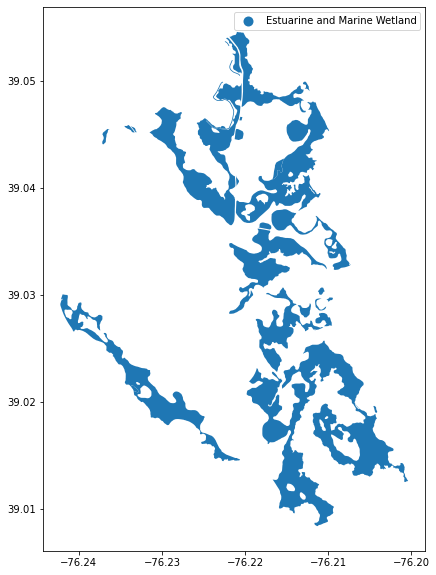

In [224]:
estuary.columns

estuary.plot(
    column="WETLAND_TY",
    legend=True,
    figsize=(15, 10));

Plot the subset with specific colors and boundaries

Text(137.99307076385497, 0.5, 'Latitude')

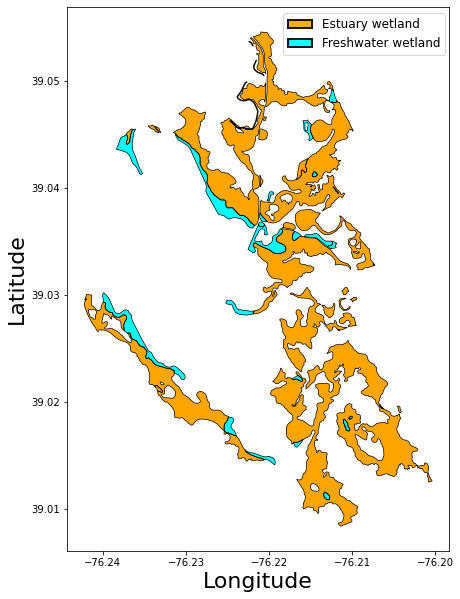

In [272]:
fig, ax = plt.subplots(figsize = (10,10))

estuary.plot(ax=ax,color='orange',legend=True)
estuary.boundary.plot(ax=ax, color='Black', linewidth=0.7)

fresh.plot(ax=ax,color='cyan',legend=True)
fresh.boundary.plot(ax=ax, color='Black', linewidth=0.7)




# Adds the legend above to the current axes in the figure
list_of_legend = ['Estuary Wetland', 'Freshwater Wetland']

color_dict = {'Estuary Wetland':'orange',
            'Freshwater Wetland':'cyan'}

import matplotlib.patches as patches

# Creates a rectangular patch for each contaminant, using the colors above
patch_list =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))

# Creates a legend with the list of patches above.
ax.legend(handles=patch_list, fontsize=12, loc='upper left',
        bbox_to_anchor = (.55,1), title_fontsize=10)

ax.set_xlabel('Longitude', size=22)
ax.set_ylabel('Latitude', size=22)

### Plot the SED data

<AxesSubplot:>

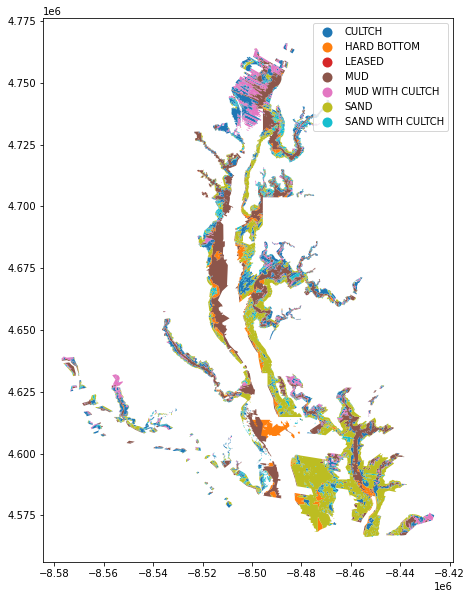

In [210]:
fig, ax = plt.subplots(figsize = (10,10))
sed.plot(column='BOTTOM', cmap=None, legend=True,ax=ax)



In [283]:
sed.head(2)

,OBJECTID,BOT_TYPE,BOTTOM,BORDER,HOLES,Shape.area,Shape.len,geometry
0,1,4,MUD WITH CULTCH,None,0,19767.962478,561.273772,"POLYGON ((-8484088.754 4763415.213, -8484041.4..."
1,2,4,MUD WITH CULTCH,None,0,49218.406343,1178.836314,"POLYGON ((-8483810.678 4763354.802, -8483827.8..."


In [286]:
sed.geometry

0       POLYGON ((-8484088.754 4763415.213, -8484041.4...
1       POLYGON ((-8483810.678 4763354.802, -8483827.8...
2       POLYGON ((-8483488.965 4763889.446, -8482703.6...
3       POLYGON ((-8485989.312 4766135.634, -8485570.8...
4       POLYGON ((-8485643.331 4765379.752, -8485685.5...
                              ...                        
7551    POLYGON ((-8489874.140 4752889.439, -8489816.3...
7552    POLYGON ((-8499726.137 4607481.766, -8499717.0...
7553    POLYGON ((-8499392.869 4607025.093, -8499195.3...
7554    POLYGON ((-8499279.260 4607207.999, -8499152.2...
7555    POLYGON ((-8499230.135 4607060.186, -8498961.1...
Name: geometry, Length: 7556, dtype: geometry

In [288]:
# Show sediment coordinates
sed.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [290]:
# Convert to lat/lon
sed = sed[sed.geometry.notnull()]
sed = sed.to_crs('epsg:4269')

(38.99, 39.06)

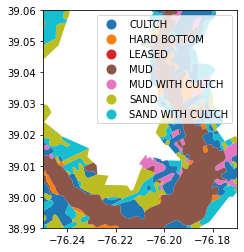

In [306]:
sed.plot(column='BOTTOM', legend=True)
plt.xlim([-76.25, -76.17])
plt.ylim([38.99, 39.06])

In [308]:
mud = sed[sed.BOTTOM == 'MUD']
mud2 = sed[sed.BOTTOM == 'MUD WITH CULTCH']

sand = sed[sed.BOTTOM == 'SAND']
sand2 = sed[sed.BOTTOM == 'SAND WITH CULTCH']


(38.99, 39.06)

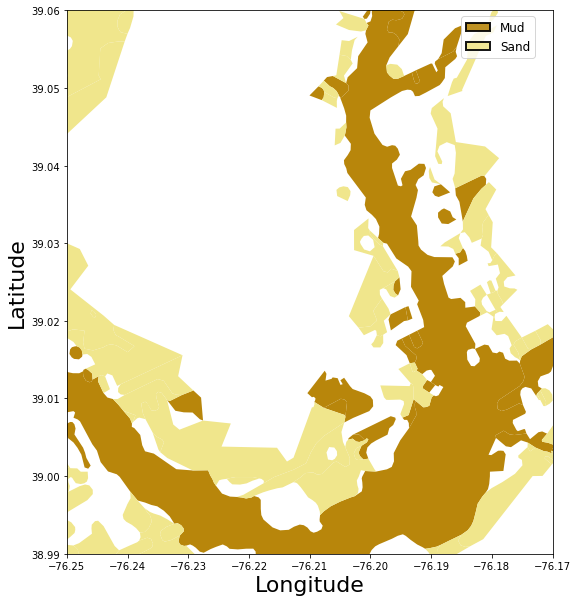

In [312]:

fig, ax = plt.subplots(figsize = (10,10))

mud.plot(ax=ax,color='darkgoldenrod',legend=True)
#mud.boundary.plot(ax=ax, color='Black', linewidth=0.7)

mud2.plot(ax=ax,color='darkgoldenrod',legend=True)

sand.plot(ax=ax,color='khaki',legend=True)
#sand.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sand2.plot(ax=ax,color='khaki',legend=True)
#sand2.boundary.plot(ax=ax, color='Black', linewidth=0.7)



# Adds the legend above to the current axes in the figure
list_of_legend = ['mud', 'sand']

color_dict = {'mud':'darkgoldenrod',
            'sand':'khaki'}

import matplotlib.patches as patches

# Creates a rectangular patch for each contaminant, using the colors above
patch_list =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))

# Creates a legend with the list of patches above.
ax.legend(handles=patch_list, fontsize=12, loc='upper left',
        bbox_to_anchor = (.8,1), title_fontsize=10)

ax.set_xlabel('Longitude', size=22)
ax.set_ylabel('Latitude', size=22)

plt.xlim([-76.25, -76.17])
plt.ylim([38.99, 39.06])

### Plot the SAV data

In [396]:
sav.columns

Index(['QUADID', 'BEDID', 'DENSITY', 'BEDLABEL', 'ZONE_', 'CBPSEG', 'ST',
       'SHAPE_STAr', 'SHAPE_STLe', 'Surveyed', 'geometry'],
      dtype='object')

In [397]:
np.unique(sav.CBPSEG)

array(['AAWPH', 'ANATF', 'APPTF', 'BACOH', 'BIGMH1', 'BIGMH2', 'BOHOH',
       'BSHOH', 'C&DOH', 'CB1TF1', 'CB1TF2', 'CB2OH', 'CB3MH', 'CB4MH',
       'CB5MH', 'CB6PH', 'CB7PH', 'CB8PH', 'CHKOH', 'CHNPH', 'CHOMH1',
       'CHOMH2', 'CHOOH', 'CHOTF', 'CHSMH', 'CHSOH', 'CHSTF', 'CRRMH',
       'EASMH', 'EBEMH', 'ELIPH', 'ELKOH1', 'ELKOH2', 'FSBMH', 'GUNOH1',
       'GUNOH2', 'HNGMH', 'IOWPH', 'JMSMH', 'JMSOH', 'JMSPH', 'JMSTF1',
       'JMSTF2', 'LAFMH', 'LCHMH', 'LYNPH', 'MAGMH', 'MANMH1', 'MANMH2',
       'MATTF', 'MIDOH', 'MOBPH', 'MPNOH', 'MPNTF', 'NANMH', 'NANOH',
       'NANTF', 'NORTF', 'PATMH', 'PAXMH1', 'PAXMH2', 'PAXMH3', 'PAXMH4',
       'PAXMH5', 'PAXMH6', 'PAXOH', 'PAXTF', 'PIAMH', 'PISTF', 'PMKOH',
       'PMKTF', 'POCMH', 'POCOH', 'POCTF', 'POTMH', 'POTOH1', 'POTOH2',
       'POTOH3', 'POTTF', 'RHDMH', 'RPPMH', 'RPPOH', 'RPPTF', 'SASOH1',
       'SASOH2', 'SBEMH', 'SEVMH', 'SOUMH', 'SPXPH', 'SVCPH1', 'SVCPH2',
       'SVCPH3', 'SVCPH4', 'SVCPH5', 'SVCPH6', 'TANMH1', 'TANMH

In [398]:
example = sav[sav.CBPSEG == 'CHSMH']
len(example)

74

In [399]:
sav.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

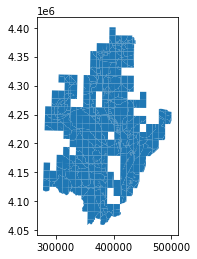

In [400]:
sav.plot()

In [401]:
sav = sav.to_crs('epsg:4269')

<AxesSubplot:>

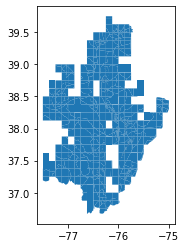

In [402]:
sav.plot()

<AxesSubplot:>

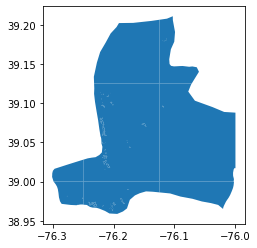

In [403]:
chester = sav[sav.CBPSEG == 'CHSMH']
chester.plot()

<AxesSubplot:>

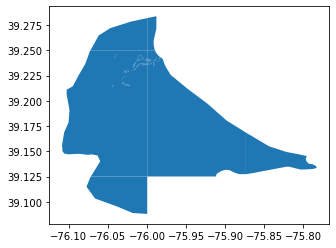

In [404]:
chester2 = sav[sav.CBPSEG == 'CHSOH']
chester2.plot()

<AxesSubplot:>

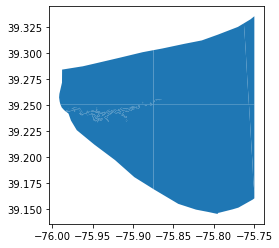

In [405]:
chester3 = sav[sav.CBPSEG == 'CHSTF']
chester3.plot()

 #### DENSITY : SAV density 0-4;
           0 - no SAV; do not include in SAV area
           1 - 0-10% cover
           2 - 10-40% cover
           3 - 40-70% cover
           4 - 70-100% cover

In [406]:
chester

,QUADID,BEDID,DENSITY,BEDLABEL,ZONE_,CBPSEG,ST,SHAPE_STAr,SHAPE_STLe,Surveyed,geometry
120,21,None,0,None,1,CHSMH,MD,7.041553e+07,33585.358257,Yes,"POLYGON ((-76.12467 39.12511, -76.13300 39.125..."
122,22,None,0,None,1,CHSMH,MD,2.520985e+07,31417.063241,Yes,"POLYGON ((-76.07160 39.12511, -76.07467 39.125..."
141,25,None,0,None,1,CHSMH,MD,1.054614e+07,13561.075550,Yes,"POLYGON ((-76.24968 39.00011, -76.25801 39.000..."
143,26,None,0,None,1,CHSMH,MD,1.272449e+08,86202.875490,Yes,"POLYGON ((-76.12467 39.12511, -76.12467 39.116..."
145,27,None,0,None,1,CHSMH,MD,1.282904e+08,48690.259207,Yes,"POLYGON ((-76.07160 39.12511, -76.07261 39.123..."
...,...,...,...,...,...,...,...,...,...,...,...
4345,26,V,4,V4,1,CHSMH,MD,1.571322e+05,6627.950372,Yes,"POLYGON ((-76.21787 39.08187, -76.21778 39.081..."
4852,33,AA,3,AA3,1,CHSMH,MD,1.435964e+04,872.821467,Yes,"POLYGON ((-76.20129 38.96386, -76.20128 38.963..."
5003,32,E,3,E3,1,CHSMH,MD,2.954631e+03,296.539880,Yes,"POLYGON ((-76.27654 38.98111, -76.27660 38.981..."
5004,32,H,3,H3,1,CHSMH,MD,2.505070e+03,201.733929,Yes,"POLYGON ((-76.25886 38.97098, -76.25894 38.970..."


In [407]:
sav0 = chester[chester.DENSITY == 0]
sav10 = chester[chester.DENSITY == 1]
sav40 = chester[chester.DENSITY == 2]
sav70 = chester[chester.DENSITY == 3]
sav100 = chester[chester.DENSITY == 4]

In [408]:
sav100

,QUADID,BEDID,DENSITY,BEDLABEL,ZONE_,CBPSEG,ST,SHAPE_STAr,SHAPE_STLe,Surveyed,geometry
1422,22,LA,4,LA4,1,CHSMH,MD,1377.224487,300.714239,Yes,"POLYGON ((-76.12008 39.17977, -76.11996 39.179..."
1425,22,JA,4,JA4,1,CHSMH,MD,4067.506592,529.601441,Yes,"POLYGON ((-76.11215 39.18148, -76.11220 39.181..."
1427,27,A,4,A4,1,CHSMH,MD,22618.411255,764.827896,Yes,"POLYGON ((-76.11872 39.09671, -76.11865 39.096..."
1428,26,T,4,T4,1,CHSMH,MD,96887.310547,2254.467845,Yes,"POLYGON ((-76.15005 39.07426, -76.14992 39.074..."
1429,26,OA,4,OA4,1,CHSMH,MD,13228.173584,770.297740,Yes,"POLYGON ((-76.17341 39.04432, -76.17333 39.044..."
1431,26,M,4,M4,1,CHSMH,MD,15134.829102,558.570488,Yes,"POLYGON ((-76.20419 39.10006, -76.20413 39.100..."
1434,26,H,4,H4,1,CHSMH,MD,5475.716553,432.521318,Yes,"POLYGON ((-76.21728 39.11122, -76.21727 39.111..."
1439,26,K,4,K4,1,CHSMH,MD,2744.837891,255.001859,Yes,"POLYGON ((-76.21812 39.10093, -76.21817 39.100..."
1440,26,P,4,P4,1,CHSMH,MD,48844.440674,1737.181132,Yes,"POLYGON ((-76.21763 39.09774, -76.21770 39.097..."
1442,26,Q,4,Q4,1,CHSMH,MD,28474.148315,1174.408744,Yes,"POLYGON ((-76.22026 39.08064, -76.22015 39.080..."


(38.99, 39.06)

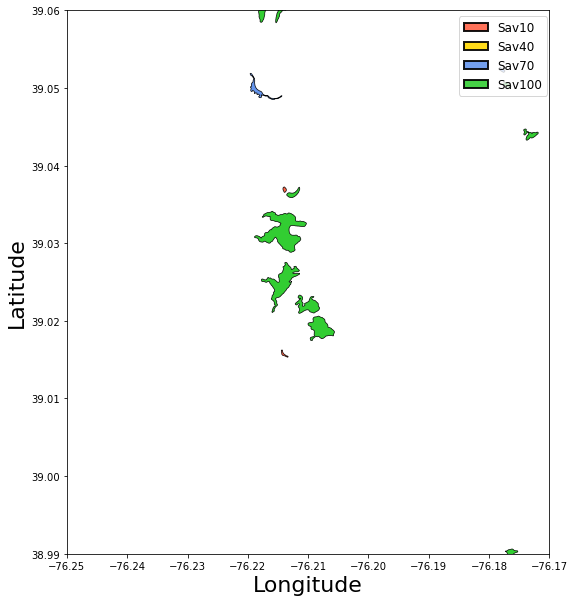

In [409]:

fig, ax = plt.subplots(figsize = (10,10))

sav10.plot(ax=ax,color='tomato',legend=True,label='10%')
sav10.boundary.plot(ax=ax, color='Black', linewidth=0.7)

#sav40.plot(ax=ax,color='gold',legend=True)
#sav40.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sav70.plot(ax=ax,color='cornflowerblue',legend=True,label='70%')
sav70.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sav100.plot(ax=ax,color='limegreen',legend=True,label='100%')
sav100.boundary.plot(ax=ax, color='Black', linewidth=0.7)



# Adds the legend above to the current axes in the figure
list_of_legend = ['sav10', 'sav40','sav70','sav100']

color_dict = {'sav10':'tomato',
              'sav40':'gold',
              'sav70':'cornflowerblue',
              'sav100':'limegreen'}

import matplotlib.patches as patches

# Creates a rectangular patch for each contaminant, using the colors above
patch_list =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))

# Creates a legend with the list of patches above.
ax.legend(handles=patch_list, fontsize=12, loc='upper left',
        bbox_to_anchor = (.8,1), title_fontsize=10)

ax.set_xlabel('Longitude', size=22)
ax.set_ylabel('Latitude', size=22)

plt.xlim([-76.25, -76.17])
plt.ylim([38.99, 39.06])

# PLOT EVERYTHING TOGETHER

(38.99, 39.06)

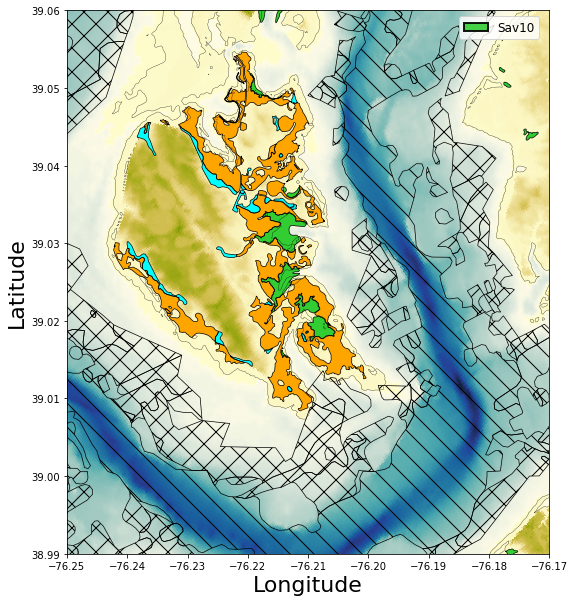

In [423]:
# Plot Data
fig, ax = plt.subplots(figsize = (10,10)) 

# Plot Grid

lightcmap = cmocean.tools.crop(cmocean.cm.delta,-20, 12, 0, N=None, dmax=None)

pg = plt.pcolormesh(lons,lats,-1*h*nr,cmap=lightcmap,shading='nearest')
plt.gca().set_aspect('equal', adjustable='box')
plt.contour(lons,lats,-1*h*nr,0,colors='black',linewidths=0.3)

# Plot Marshes

estuary.plot(ax=ax,color='orange',legend=True)
estuary.boundary.plot(ax=ax, color='Black', linewidth=0.7)

fresh.plot(ax=ax,color='cyan',legend=True)
fresh.boundary.plot(ax=ax, color='Black', linewidth=0.7)




# Adds the legend above to the current axes in the figure
list_of_legend = ['Estuary Wetland', 'Freshwater Wetland']

color_dict = {'Estuary Wetland':'orange',
            'Freshwater Wetland':'cyan'}

import matplotlib.patches as patches

# Creates a rectangular patch for each contaminant, using the colors above
patch_list1 =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list1.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))




mud.plot(ax=ax,color='saddlebrown',legend=True,hatch='\\', alpha=0.3)
#mud.boundary.plot(ax=ax, color='Black', linewidth=0.7)

mud2.plot(ax=ax,color='saddlebrown',legend=True,hatch='\\', alpha=0.3)

sand.plot(ax=ax,color='khaki',legend=True,hatch='x', alpha=0.3)
#sand.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sand2.plot(ax=ax,color='khaki',legend=True,hatch='x', alpha=0.3)
#sand2.boundary.plot(ax=ax, color='Black', linewidth=0.7)

#mud.boundary.plot(ax=ax, color='Black',hatch='\\', linewidth=0.7)
#mud2.boundary.plot(ax=ax, color='Black',hatch='\\', linewidth=0.7)
#sand.boundary.plot(ax=ax, color='Black',hatch='x', linewidth=0.7)
#sand2.boundary.plot(ax=ax, color='Black',hatch='x', linewidth=0.7)


# Adds the legend above to the current axes in the figure
list_of_legend = ['mud', 'sand']

color_dict = {'mud':'saddlebrown',
            'sand':'khaki'}

import matplotlib.patches as patches

# Creates a rectangular patch for each contaminant, using the colors above
patch_list2 =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list2.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))


sav10.plot(ax=ax,color='limegreen',legend=True,label='10%')
sav10.boundary.plot(ax=ax, color='Black', linewidth=0.7)

#sav40.plot(ax=ax,color='gold',legend=True)
#sav40.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sav70.plot(ax=ax,color='limegreen',legend=True,label='70%')
sav70.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sav100.plot(ax=ax,color='limegreen',legend=True,label='100%')
sav100.boundary.plot(ax=ax, color='Black', linewidth=0.7)



# Adds the legend above to the current axes in the figure
list_of_legend = ['sav10']

color_dict = {'sav10':'limegreen'}

import matplotlib.patches as patches

# Creates a rectangular patch for each contaminant, using the colors above
patch_list3 =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list3.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))

    
# Creates a legend with the list of patches above.
ax.legend(handles=patch_list1, fontsize=12, loc='upper left',
        bbox_to_anchor = (.55,1), title_fontsize=10)

# Creates a legend with the list of patches above.
ax.legend(handles=patch_list2, fontsize=12, loc='upper left',
        bbox_to_anchor = (.8,1), title_fontsize=10)

# Creates a legend with the list of patches above.
ax.legend(handles=patch_list3, fontsize=12, loc='upper left',
        bbox_to_anchor = (.8,1), title_fontsize=10)




ax.set_xlabel('Longitude', size=22)
ax.set_ylabel('Latitude', size=22)

plt.xlim([-76.25, -76.17])
plt.ylim([38.99, 39.06])


In [ ]:
## Plot Data
fig, ax = plt.subplots(figsize = (10,10)) 

## Plot Grid

lightcmap = cmocean.tools.crop(cmocean.cm.delta,-20, 12, 0, N=None, dmax=None)

pg = plt.pcolormesh(lons,lats,-1*h*nr,cmap=lightcmap,shading='nearest')
plt.gca().set_aspect('equal', adjustable='box')
plt.contour(lons,lats,-1*h*nr,0,colors='black',linewidths=0.3)

## Plot Marshes

estuary.plot(ax=ax,color='orange',legend=True)
estuary.boundary.plot(ax=ax, color='Black', linewidth=0.7)

fresh.plot(ax=ax,color='cyan',legend=True)
fresh.boundary.plot(ax=ax, color='Black', linewidth=0.7)

## Plot Sediment

mud.plot(ax=ax,facecolor='saddlebrown',legend=True,hatch='\\', alpha=0.7)
#mud.boundary.plot(ax=ax, color='Black', linewidth=0.7)

mud2.plot(ax=ax,facecolor='saddlebrown',legend=True,hatch='\\', alpha=0.7)

sand.plot(ax=ax,facecolor='goldenrod',legend=True,hatch='x', alpha=0.3)
#sand.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sand2.plot(ax=ax,facecolor='goldenrod',legend=True,hatch='x', alpha=0.3)
#sand2.boundary.plot(ax=ax, color='Black', linewidth=0.7)

#mud.boundary.plot(ax=ax, color='Black',hatch='\\', linewidth=0.7)
#mud2.boundary.plot(ax=ax, color='Black',hatch='\\', linewidth=0.7)
#sand.boundary.plot(ax=ax, color='Black',hatch='x', linewidth=0.7)
#sand2.boundary.plot(ax=ax, color='Black',hatch='x', linewidth=0.7)

## PLOT SAV
sav=sav10
sav.plot(ax=ax,color='limegreen',legend=True,label='10%')
sav.boundary.plot(ax=ax, color='Black', linewidth=0.7)

#sav40.plot(ax=ax,color='gold',legend=True)
#sav40.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sav70.plot(ax=ax,color='limegreen',legend=True,label='70%')
sav70.boundary.plot(ax=ax, color='Black', linewidth=0.7)

sav100.plot(ax=ax,color='limegreen',legend=True,label='100%')
sav100.boundary.plot(ax=ax, color='Black', linewidth=0.7)




# Adds the legend above to the current axes in the figure
list_of_legend = ['Estuary Wetland', 'Freshwater Wetland','mud', 'sand','sav']

color_dict = {'Estuary Wetland':'orange',
            'Freshwater Wetland':'cyan',
            'mud':'saddlebrown',
            'sand':'goldenrod',
            'sav':'limegreen'}

# Creates a rectangular patch for each contaminant, using the colors above
patch_list1 =[]
for ion in list_of_legend:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list1.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=2, 
                                    edgecolor='black'))
    
    
# Creates a legend with the list of patches above.
ax.legend(handles=patch_list1, fontsize=12, loc='upper left',
        bbox_to_anchor = (.65,1), title_fontsize=10)

    
ax.set_xlabel('Longitude', size=22)
ax.set_ylabel('Latitude', size=22)

plt.xlim([-76.28, -76.15])
plt.ylim([38.98, 39.08])

plt.title(label="Eastern Neck Wildlife Refuge",fontsize=24) 
plt.savefig('EasternNeckWildlifeRefuge_MappedParameters_wcontour.png', bbox_inches='tight')
